In [7]:
# Initializing


import pandas as pd 

import numpy as np 


%matplotlib inline

import matplotlib.pyplot as plt 
import seaborn as sns
color = sns.color_palette()

sns.set_style("darkgrid")

# ignore sklearn & seaborn warnings
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn 


from scipy import stats
from scipy.stats import norm, skew  #ex. sns(fit = norm)


# Format scientific notation from pandas aggregation
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000) 

In [8]:
df_dummies = pd.read_csv('data/all_data.csv')
df_no_dummies = pd.read_csv('data/all_data_no_dummies.csv') 

In [9]:
targets = pd.read_csv('data/y_train.csv') 

In [10]:
from sklearn.model_selection import GridSearchCV, train_test_split 

from sklearn import linear_model as lm 
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor 

from sklearn.metrics import mean_squared_error  

#rms error: 
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))  

### Split all_data into train and test: 

In [11]:
ntrain = targets.shape[0] 
x_d = df_dummies[:ntrain]
x_d_kag_test = df_dummies[ntrain:]
x_nd = df_no_dummies[:ntrain]
x_nd__kag_test = df_no_dummies[ntrain:]
targets_log = targets.apply(np.log)


In [12]:
x_d_kag_test.shape

(1459, 69)

In [39]:
x_nd.Exterior1st.value_counts() 

VinylSd    512
HdBoard    220
MetalSd    219
Wd Sdng    205
Plywood    108
CemntBd     57
BrkFace     50
WdShing     26
Stucco      24
AsbShng     20
Stone        2
BrkComm      2
CBlock       1
AsphShn      1
ImStucc      1
Name: Exterior1st, dtype: int64

In [40]:
x_nd.Neighborhood.value_counts() #NAmes 

NAmes      226
CollgCr    150
OldTown    113
Edwards     98
Somerst     86
Gilbert     79
NridgHt     74
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     50
Mitchel     49
NoRidge     38
IDOTRR      37
Timber      37
ClearCr     28
SWISU       25
StoneBr     22
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [41]:
x_nd.Foundation.value_counts() #CBlock

CBlock    635
PConc     634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

In [42]:
x_nd.HouseStyle.value_counts() #1Story

1Story    723
2Story    437
1.5Fin    154
SLvl       64
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

In [43]:
x_nd.LotShape.value_counts() #Reg 

Reg    922
IR1    477
IR2     40
IR3      9
Name: LotShape, dtype: int64

In [44]:
x_d.columns 

Index(['ExterQual', 'Fireplaces', 'GarageArea', 'GrLivArea', 'HeatingQC', 'KitchenQual', 'OverallQual', 'TotRmsAbvGrd', 'Num_Bathrooms', 'HouseSF', 'YearRemodAgg', 'Exterior1st_AsbShng', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_CemntBd', 'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_MetalSd', 'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior1st_Stucco', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior1st_WdShing', 'Foundation_BrkTil', 'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood', 'HouseStyle_1.5Fin', 'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'HouseStyle_2Story', 'HouseStyle_SFoyer', 'HouseStyle_SLvl', 'LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
  

In [13]:
#drop dominant columns for dummified variables 

x_d_dom_drop = x_d.drop(['Exterior1st_VinylSd', 'Foundation_CBlock', 'HouseStyle_1Story', 'Neighborhood_NAmes'], axis = 1)  

In [14]:
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()
scaler.fit(x_d_dom_drop)
x_d_std = scaler.transform(x_d_dom_drop)

x_d_std = pd.DataFrame(x_d_std) 


In [15]:
x_d_kag_dom_drop = x_d_kag_test.drop(['Exterior1st_VinylSd', 'Foundation_CBlock', 'HouseStyle_1Story', 'Neighborhood_NAmes'], axis = 1)   

In [16]:
scaler.fit(x_d_kag_dom_drop)
x_d_kag_std = scaler.transform(x_d_kag_dom_drop)

x_d_kag_std = pd.DataFrame(x_d_kag_std)  

### Split x_d_std and targets into train and test using train_test_split: 

In [17]:
x_d_train, x_d_test, y_d_train, y_d_test = train_test_split(x_d_std, targets_log, test_size = 0.2, random_state = 42) 


## MODELLING

### 1. Multiple Linear Regression: 

In [160]:
lm_model =lm.LinearRegression()
lm_model.fit(x_d_train, y_d_train)

#RMS error 
print("RMSE train: {}".format(rmse(y_d_train, lm_model.predict(x_d_train)))) 
print("RMSE test : {}".format(rmse(y_d_test,  lm_model.predict(x_d_test)))) 
print('R^2 score: {}'.format(lm_model.score(x_d_train, y_d_train)))




RMSE train: 0.12113037807583424
RMSE test : 0.1495517080376652
R^2 score: 0.9028802079456864


### 2. Ridge/Lasso/Elastic Net : Penalised LR 

In [167]:
#1. ridge: 

grid_param = [{'alpha': np.linspace(1e-3,1e-2,50)}]

gs = GridSearchCV(estimator=lm.Ridge(random_state=42), param_grid=grid_param, cv=5)

gs.fit(x_d_std, targets_log)

#cv_results_, grid_scores_ (to obsolete), best_estimator_, best_params_, best_score_
print('Best params: {}'.format(gs.best_params_))
print('Best score : {}'.format(gs.best_score_))
#print('')
model = gs.best_estimator_
print("RMSE train: {}".format(rmse(y_d_train, model.predict(x_d_train))))
print("RMSE test : {}".format(rmse(y_d_test,  model.predict(x_d_test))))
print('R^2 score: {}'.format(model.score(x_d_train, y_d_train))) 

Best params: {'alpha': 0.01}
Best score : 0.8776437369714835
RMSE train: 0.12191185644643433
RMSE test : 0.14340766883970618
R^2 score: 0.9016230197051082


In [166]:
x_d_kag_std.shape

(1459, 65)

### Kaggle Test Submission 1: Predict on test set using Ridge regression

In [193]:
y_pred_ridge = model.predict(x_d_kag_std)  
y_pred_ridge = pd.DataFrame(y_pred_ridge) 
y_pred_ridge[0] = y_pred_ridge[0].apply(lambda x: np.exp(x)) 
y_pred_ridge = y_pred_ridge.reset_index() 
y_pred_ridge.columns = ['Id', 'SalePrice']
y_pred_ridge['Id'] = y_pred_ridge['Id'].apply(lambda x: x + 1461) 
y_pred_ridge.set_index('Id', inplace = True)
y_pred_ridge.to_csv('data/kaggle_ridge_submission1.csv') #0.14729 

In [135]:
#2. Lasso: 

grid_param = [{'alpha': np.linspace(1e-4,1e-2,20)}] 

gs = GridSearchCV(estimator=lm.Lasso(random_state= 42, normalize=False), param_grid=grid_param, cv=5)

gs.fit(x_d_std, targets_log)

#cv_results_, grid_scores_ (to obsolete), best_estimator_, best_params_, best_score_
print('Best params: {}'.format(gs.best_params_))
print('Best score : {}'.format(gs.best_score_))
#print('')
model = gs.best_estimator_
print("RMSE train: {}".format(rmse(y_d_train, model.predict(x_d_train))))
print("RMSE test : {}".format(rmse(y_d_test,  model.predict(x_d_test)))) 


Best params: {'alpha': 0.0032263157894736843}
Best score : 0.8806970633098339
RMSE train: 0.12371275973156066
RMSE test : 0.14478464098885507


In [136]:
model.fit(x_d_std, targets_log)
print('The intercept is %.4f' %(model.intercept_))
lassoCoef = pd.Series(model.coef_, index=x_d_std.columns)
print('The slopes are \n%s' %(lassoCoef))  

The intercept is 12.0156
The slopes are 
0     0.001
1     0.027
2     0.016
3     0.023
4     0.019
5     0.026
6     0.094
7     0.000
8     0.035
9     0.133
10    0.050
11   -0.004
12   -0.000
13   -0.009
14    0.009
15    0.000
16    0.001
17    0.000
18    0.000
19    0.000
20   -0.000
21    0.000
22    0.000
23   -0.001
24   -0.000
25   -0.009
26    0.000
27   -0.000
28    0.000
29   -0.000
      ...  
35    0.000
36    0.005
37    0.000
38    0.006
39    0.000
40   -0.009
41   -0.004
42   -0.000
43   -0.016
44    0.002
45    0.011
46   -0.000
47    0.023
48   -0.005
49   -0.000
50   -0.021
51   -0.017
52   -0.000
53   -0.001
54   -0.000
55    0.003
56    0.007
57   -0.016
58   -0.000
59    0.000
60   -0.001
61    0.000
62    0.005
63    0.002
64    0.006
Length: 65, dtype: float64


In [138]:
#3: Elastic Net 

grid_param = [{'alpha': np.linspace(1e-4,1e-2,70), 'l1_ratio': np.linspace(0.015, 1, 20)}]

# Confirmed that setting scoring='neg_mean_squared_error' is the same result as using the default "R2" score.
gs = GridSearchCV(estimator=lm.ElasticNet(random_state=42), param_grid=grid_param, cv=5)

gs.fit(x_d_std, targets_log) 

#cv_results_, grid_scores_ (to obsolete), best_estimator_, best_params_, best_score_
print('Best params: {}'.format(gs.best_params_))
print('Best score : {}'.format(gs.best_score_)) 
#print('')
model = gs.best_estimator_
print("RMSE train: {}".format(rmse(y_d_train, model.predict(x_d_train))))
print("RMSE test : {}".format(rmse(y_d_test, model.predict(x_d_test))))  

Best params: {'alpha': 0.01, 'l1_ratio': 0.32605263157894737}
Best score : 0.8808275934752425
RMSE train: 0.1237015182855613
RMSE test : 0.14486831677419731


In [137]:
#proportion of coeffs > 1e-6 out of all coeffs 

sum(model.coef_ > 1e-6) / model.coef_.shape[0]  

0.3384615384615385

Preparation for tree-based models: encode nominal categorical variables in x_nd df: 

In [111]:
x_nd.columns

Index(['Unnamed: 0', 'ExterQual', 'Exterior1st', 'Fireplaces', 'Foundation', 'GarageArea', 'GrLivArea', 'HeatingQC', 'HouseStyle', 'KitchenQual', 'LotShape', 'Neighborhood', 'OverallQual', 'TotRmsAbvGrd', 'Num_Bathrooms', 'HouseSF', 'YearRemodAgg'], dtype='object')

In [112]:
#drop first column, and determine which columns are nominal categorical 

x_nd = x_nd.drop('Unnamed: 0', axis = 1)
x_nd.select_dtypes(['object']) 

,Exterior1st,Foundation,HouseStyle,LotShape,Neighborhood
0,VinylSd,PConc,2Story,Reg,CollgCr
1,MetalSd,CBlock,1Story,Reg,Veenker
2,VinylSd,PConc,2Story,IR1,CollgCr
3,Wd Sdng,BrkTil,2Story,IR1,Crawfor
4,VinylSd,PConc,2Story,IR1,NoRidge
5,VinylSd,Wood,1.5Fin,IR1,Mitchel
6,VinylSd,PConc,1Story,Reg,Somerst
7,HdBoard,CBlock,2Story,IR1,NWAmes
8,BrkFace,BrkTil,1.5Fin,Reg,OldTown
9,MetalSd,BrkTil,1.5Unf,Reg,BrkSide


In [113]:
from sklearn.preprocessing import LabelEncoder

'''
HouseSF', 0.2725794204816994),
 ('OverallQual', 0.18367601255210747),
 ('KitchenQual', 0.12356260364685952),
 ('YearRemodAgg', 0.09478348853681917),
 ('HouseStyle', 0.07907912271330644),
 ('Neighborhood', 0.05854045717122344),
 ('Num_Bathrooms', 0.05841803302668867)
''' 

In [114]:
#use LabelEncode to encode categorical vars 

lencoder = LabelEncoder()

exterior1st_labels  =lencoder.fit_transform(x_nd.Exterior1st).reshape((-1,1))
#foundation_labels = lencoder.fit_transform(x_nd.Foundation).reshape((-1,1))  
housestyle_labels    = lencoder.fit_transform(x_nd.HouseStyle).reshape((-1,1))
#lotshape_labels   = lencoder.fit_transform(x_nd.LotShape).reshape((-1,1))
neighborhood_labels= lencoder.fit_transform(x_nd.Neighborhood).reshape((-1,1)) 

In [115]:
#create list numerical + encoded nominal categorical features 

num_cols = ['KitchenQual','OverallQual', 'Num_Bathrooms', 'HouseSF', 'YearRemodAgg']
x_nd_le = [neighborhood_labels]
for col in num_cols: 
    x_nd_le.append(x_nd[col].reshape((-1, 1))) 
    

In [68]:
x_nd_le

[array([[ 5],
        [24],
        [ 5],
        ...,
        [12],
        [ 7],
        [12]]), array([[3],
        [2],
        [3],
        ...,
        [3],
        [2],
        [2]]), array([[7],
        [6],
        [7],
        ...,
        [5],
        [5],
        [5]]), array([[4.],
        [3.],
        [4.],
        ...,
        [2.],
        [3.],
        [1.]]), array([[3114.],
        [2984.],
        [3314.],
        ...,
        [2396.],
        [2788.],
        [2508.]]), array([[2003. ],
        [1976. ],
        [2001.5],
        ...,
        [1973. ],
        [1965. ],
        [1961. ]])]

In [116]:
#concatenate features (including encoded nominal categorical variables)-> new dataframe 

x_nd_le = np.concatenate(x_nd_le, axis = 1)
x_nd_le = pd.DataFrame(x_nd_le)  
x_nd_le.columns = ['neighborhood', 'kitchenqual', 'overallqual', 'num_bathrooms', 'housesf', 'year_remod_agg'] 

In [117]:
x_nd_le.head()

,neighborhood,kitchenqual,overallqual,num_bathrooms,housesf,year_remod_agg
0,5.000,3.000,7.000,4.000,3114.000,2003.000
1,24.000,2.000,6.000,3.000,2984.000,1976.000
2,5.000,3.000,7.000,4.000,3314.000,2001.500
3,6.000,3.000,7.000,2.000,3115.000,1942.500
4,15.000,3.000,8.000,4.000,4179.000,2000.000


In [119]:
#train_test split of non-dummified dataframe 

x_nd_train, x_nd_test, y_nd_train, y_nd_test = train_test_split(x_nd_le, targets_log, test_size = 0.2, random_state = 42)  


### 3. Random Forest 

In [120]:

#test random forest regressor with default parameters: 

randomForest = RandomForestRegressor()

# fit RF model on training set
randomForest.set_params(random_state=42)

randomForest.fit(x_nd_train, y_nd_train)  

print("The training error is: %.5f" % (1- randomForest.score(x_nd_train, y_nd_train))) 
print("The test     error is: %.5f" % (1 - randomForest.score(x_nd_test, y_nd_test)))   

The training error is: 0.04859
The test     error is: 0.28646


In [121]:
grid_para_forest = {
    'n_estimators': range(80, 200, 10),
    'max_depth': range(3,12),
    'max_features': ['sqrt', 'auto']
}  

In [122]:
gs = GridSearchCV(estimator = RandomForestRegressor(\
                                    min_samples_split=5,\
                                    #max_depth = 10,\
                                    min_samples_leaf=1,\
                                    random_state=42,\
                                    n_jobs=-1),\
                  param_grid = grid_para_forest, n_jobs=-1, cv=5)   

In [123]:
gs.fit(x_nd_train, y_nd_train)  

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=5,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=-1,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': range(3, 12),
          

In [298]:
print('Best params: {}'.format(gs.best_params_))
print('Best score : {}'.format(gs.best_score_))   

Best params: {'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 90}
Best score : 0.7694308012689799


In [124]:
forest_final = gs.best_estimator_
print("RMSE train: {}".format(rmse(y_d_train, forest_final.predict(x_nd_train)))) #0.1044
print("RMSE test : {}".format(rmse(y_d_test,  forest_final.predict(x_nd_test)))) #0.1962  

RMSE train: 0.1370776203002676
RMSE test : 0.19620686829323788


In [125]:

forest_feature_importance = forest_final.feature_importances_

forest_sorted_features = sorted(list(zip(x_nd_le.columns, forest_feature_importance)), key = lambda kv: kv[1], reverse = True) 

forest_sorted_features 

[('housesf', 0.4007116462865751),
 ('overallqual', 0.2153847488979508),
 ('year_remod_agg', 0.14127826204855218),
 ('kitchenqual', 0.11586024082597046),
 ('num_bathrooms', 0.08905445677203017),
 ('neighborhood', 0.03771064516892126)]

Text(0.5,1,'Feature Importance: Random Forest')

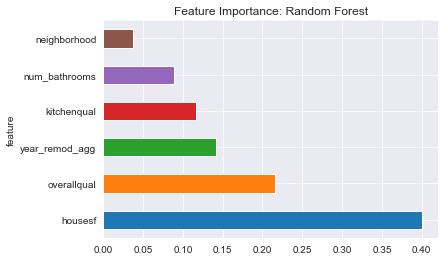

In [126]:
#graph feature importances of top 25 features 

a, b = zip(*forest_sorted_features)
importance_score = pd.DataFrame({'feature':a, 'score':b})
importance_score.plot.barh(x='feature', y='score', legend=None)
plt.title('Feature Importance: Random Forest')

### 4. GBM

In [127]:
gbm = GradientBoostingRegressor()  

In [128]:
gbm_1 = gbm.fit(x_nd_train, y_nd_train) 

print("The training error is: %.5f" % (1- gbm.score(x_nd_train, y_nd_train))) 
print("The test     error is: %.5f" % (1 - gbm.score(x_nd_test, y_nd_test)))   

The training error is: 0.14498
The test     error is: 0.27532


In [221]:
from sklearn.metrics import r2_score 
n_estimators = 50100
steps = range(100, 50100, 1000)

gbm.set_params(learning_rate = 1, n_estimators=n_estimators, max_depth=3)
gbm.fit(x_nd_train, y_nd_train)
gen = gbm.staged_predict(x_nd_train)
r2_rate1 = []
for n in range(n_estimators):
           predicted_targets = next(gen)
           if n not in steps: continue
           r2_rate1.append(r2_score(predicted_targets, y_nd_train))    

KeyboardInterrupt: 

In [186]:
from sklearn.metrics import r2_score 
n_estimators = 50100
steps = range(100, 50100, 1000)

gbm.set_params(learning_rate = 0.1, n_estimators=n_estimators, max_depth=3)
gbm.fit(x_nd_train, y_nd_train)
gen = gbm.staged_predict(x_nd_train)
r2_rate01 = []
for n in range(n_estimators):
           predicted_targets = next(gen)
           if n not in steps: continue
           r2_rate01.append(r2_score(predicted_targets, y_nd_train))    

In [130]:
from sklearn.metrics import r2_score 
n_estimators = 50100
steps = range(100, 50100, 1000)

gbm.set_params(learning_rate = 0.01, n_estimators=n_estimators, max_depth=3)
gbm.fit(x_nd_train, y_nd_train)
gen = gbm.staged_predict(x_nd_train)
r2_rate001 = []
for n in range(n_estimators):
           predicted_targets = next(gen)
           if n not in steps: continue
           r2_rate001.append(r2_score(predicted_targets, y_nd_train))    

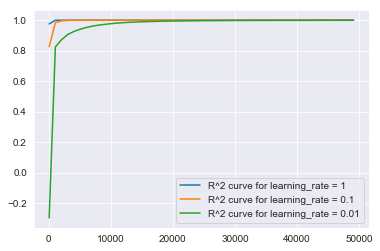

In [188]:
plt.plot(steps, r2_rate1,  label=r'R^2 curve for learning_rate = 1')
plt.plot(steps, r2_rate01, label=r'R^2 curve for learning_rate = 0.1')
plt.plot(steps, r2_rate001, label=r'R^2 curve for learning_rate = 0.01')
plt.legend(loc=4) 

In [131]:
n_estimators = 3000
gbm.set_params(learning_rate=0.005, max_depth=5, max_features = 'sqrt', subsample = 0.9,  n_estimators=n_estimators, min_samples_split=7,
min_samples_leaf=10)

train_r2 = []
test_r2  = []
steps = range(100, 3000, 100)

gbm.fit(x_nd_train,y_nd_train)
gen_train = gbm.staged_predict(x_nd_train) #generators 
gen_test  = gbm.staged_predict(x_nd_test)

for n in range(n_estimators):
           predicted_train = next(gen_train)
           predicted_test  = next(gen_test)
           if n not in steps: continue
           train_r2.append(r2_score(predicted_train, y_nd_train))
           test_r2.append(r2_score(predicted_test, y_nd_test))        

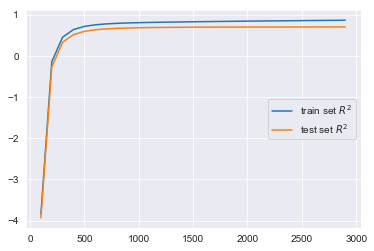

In [132]:
plt.plot(steps, train_r2, label='train set $R^2$')
plt.plot(steps, test_r2, label='test set $R^2$')
plt.legend(loc=7) 

In [133]:
print(max(train_r2),max(test_r2))

0.8626162626357716 0.6999483231117389


In [134]:
print("RMSE train: {}".format(rmse(y_nd_train, gbm.predict(x_nd_train))))
print("RMSE test : {}".format(rmse(y_nd_test,  gbm.predict(x_nd_test)))) 

RMSE train: 0.13002871788240775
RMSE test : 0.19345663414983644


In [293]:
gbm_feature_importance = gbm.feature_importances_

gbm_sorted_features = sorted(list(zip(x_nd_le.columns, gbm_feature_importance)), key = lambda kv: kv[1], reverse = True) 

gbm_sorted_features 

[('housesf', 0.3997754496291378),
 ('overallqual', 0.24452923889272618),
 ('year_remod_agg', 0.14314877171759016),
 ('kitchenqual', 0.08674165118042029),
 ('num_bathrooms', 0.08266537505836453),
 ('neighborhood', 0.04313951352176089)]

In [304]:
grid_para_gbm = {
    'max_depth': range(3,10),
    'max_features': ['sqrt', 'auto'], 
    'min_samples_split':range(3,21,3), 
    'min_samples_leaf': np.arange(1,10,1),
    'subsample':[0.6,0.7,0.75,0.8,0.85,0.9], 
    'learning_rate': [0.005, 0.01, 0.05, 0.1]   
}  

In [305]:
gs = GridSearchCV(estimator = GradientBoostingRegressor(n_estimators = 500), param_grid = grid_para_gbm, n_jobs = -1, cv = 5)   

In [306]:
gs.fit(x_nd_train, y_nd_train) 

KeyboardInterrupt: 

In [ ]:
print('Best params: {}'.format(gs.best_params_))
print('Best score : {}'.format(gs.best_score_))
print('')
model = gs.best_estimator_
print("RMSE train: {}".format(rmse(y_nd_train, model.predict(x_nd_train))))
print("RMSE test : {}".format(rmse(y_nd_test,  model.predict(x_nd_test))))

### 5. SVR

In [307]:
from sklearn.svm import SVR

In [ ]:
svr = SVR()
svr.set_params(kernel='rbf') 

paramDict = {'C': np.linspace(1, 100, 20), 'gamma': np.linspace(1e-4, 1e-2, 10)}
svr_grid = GridSearchCV(svr, paramDict, cv=5, return_train_score = True)
svr_grid.fit(x_d_train, y_d_train) 



In [329]:
svr_grid.best_params_ 
svr_grid.best_score_

0.4215911969172941

In [330]:
svr_best = svr_grid.best_estimator_
svr_best.fit(x_d_train,y_d_train)
svr_best.score(x_d_train, y_d_train)

0.8974298508940413

In [331]:
print("RMSE train: {}".format(rmse(y_d_train, svr_best.predict(x_d_train))))
print("RMSE test : {}".format(rmse(y_d_test, svr_best.predict(x_d_test))))

RMSE train: 0.12379148817191436
RMSE test : 0.2949315596484075


### 6. Stacking: 

### Stack base models: 

In [22]:
from mlxtend.regressor import StackingRegressor




In [77]:
models = [
    # linear model
 
    #lm.ElasticNet(alpha = 0.01, l1_ratio = 0.32605263157894737, random_state=42),
    
    lm.Ridge(alpha = 0.01, random_state = 42), 
 
     #conservative random forest model
    RandomForestRegressor(\
                        max_depth=5,\
                        max_features='sqrt',\
                        n_estimators=1000,\
                        random_state=42,\
                        n_jobs=-1),
    
#     RandomForestRegressor(\
#                         max_features= 8,\
#                         n_estimators=200,\
#                         min_samples_split=5,\
#                         min_samples_leaf=1,\
#                         random_state= 42,\
#                         n_jobs=-1),
#     RandomForestRegressor(\
#                         max_depth=None,\
#                         max_features=8,\
#                         n_estimators=170,\
#                         random_state=42,\
#                         n_jobs=-1),
    
    #conservative gbm model
    GradientBoostingRegressor(\
                        learning_rate=0.005,\
                        n_estimators=3000,\
                        max_depth=2,\
                        min_samples_split=40,\
                        min_samples_leaf=10,\
                        max_features=8,\
                        subsample=0.8,\
                        random_state=42),
    
#     GradientBoostingRegressor(\
#                         learning_rate=0.005,\
#                         n_estimators=3000,\
#                         max_depth=5,\
#                         min_samples_split=7,\
#                         min_samples_leaf=1,\
#                         max_features='sqrt',\
#                         subsample=0.8,\
#                         random_state= 42)
    
#     GradientBoostingRegressor(\
#                         learning_rate=0.01,\
#                         n_estimators=2000,\
#                         max_depth=5,\
#                         min_samples_split=28,\
#                         min_samples_leaf=3,\
#                         max_features=63,\
#                         subsample=0.8,\
#                         random_state=rs_const)
    ]

meta_model = lm.LinearRegression(normalize=False) 

In [78]:
stack_reg = StackingRegressor(regressors= models, 
                           meta_regressor=meta_model) 

In [79]:

stack_reg.fit(x_d_train, y_d_train)
stack_reg.predict(x_d_train)  

array([[11.60672661],
       [11.70245887],
       [11.93452657],
       ...,
       [12.22047054],
       [12.48720369],
       [12.08838825]])

In [80]:
print("RMSE train: {}".format(rmse(y_d_train, stack_reg.predict(x_d_train))))
print("RMSE test: {}".format(rmse(y_d_test, stack_reg.predict(x_d_test)))) 

# train: 0.113
#test: 0.1476

RMSE train: 0.11308471534902924
RMSE test: 0.1476073909840703


In [48]:
y_pred_stack = stack_reg.predict(x_d_kag_std)  
y_pred_stack = pd.DataFrame(y_pred_stack) 
y_pred_stack[0] = y_pred_stack[0].apply(lambda x: np.exp(x)) 
y_pred_stack = y_pred_stack.reset_index() 
y_pred_stack.columns = ['Id', 'SalePrice']
y_pred_stack['Id'] = y_pred_stack['Id'].apply(lambda x: x + 1461) 
y_pred_stack.set_index('Id', inplace = True)
y_pred_stack.to_csv('data/kaggle_ridge_submission2.csv') 